In [0]:
%sql DESCRIBE EXTENDED workspace.default.airlines_flights_data

col_name,data_type,comment
index,bigint,null
airline,string,null
flight,string,null
source_city,string,null
departure_time,string,null
stops,string,null
arrival_time,string,null
destination_city,string,null
class,string,null
duration,double,null


In [0]:
%fs ls /Volumes/workspace/default/test1

path,name,size,modificationTime
dbfs:/Volumes/workspace/default/test1/airlines_flights_data.csv,airlines_flights_data.csv,24946485,1755015725000


In [0]:
airlinedf=spark.read.format("csv").option("header","true").option("inferSchema","true").load("/Volumes/workspace/default/test1")

In [0]:
airlinedf.show();

+-----+---------+-------+-----------+--------------+-----+-------------+----------------+-------+--------+---------+-----+
|index|  airline| flight|source_city|departure_time|stops| arrival_time|destination_city|  class|duration|days_left|price|
+-----+---------+-------+-----------+--------------+-----+-------------+----------------+-------+--------+---------+-----+
|    0| SpiceJet|SG-8709|      Delhi|       Evening| zero|        Night|          Mumbai|Economy|    2.17|        1| 5953|
|    1| SpiceJet|SG-8157|      Delhi| Early_Morning| zero|      Morning|          Mumbai|Economy|    2.33|        1| 5953|
|    2|  AirAsia| I5-764|      Delhi| Early_Morning| zero|Early_Morning|          Mumbai|Economy|    2.17|        1| 5956|
|    3|  Vistara| UK-995|      Delhi|       Morning| zero|    Afternoon|          Mumbai|Economy|    2.25|        1| 5955|
|    4|  Vistara| UK-963|      Delhi|       Morning| zero|      Morning|          Mumbai|Economy|    2.33|        1| 5955|
|    5|  Vistara

In [0]:
airlinedf.printSchema();

root
 |-- index: integer (nullable = true)
 |-- airline: string (nullable = true)
 |-- flight: string (nullable = true)
 |-- source_city: string (nullable = true)
 |-- departure_time: string (nullable = true)
 |-- stops: string (nullable = true)
 |-- arrival_time: string (nullable = true)
 |-- destination_city: string (nullable = true)
 |-- class: string (nullable = true)
 |-- duration: double (nullable = true)
 |-- days_left: integer (nullable = true)
 |-- price: integer (nullable = true)



In [0]:
airlinedf.count();
airlinedf.columns;
airlinedf.describe().show()

+-------+-----------------+-------+--------------------+-----------+--------------+------+------------+----------------+--------+------------------+------------------+------------------+
|summary|            index|airline|              flight|source_city|departure_time| stops|arrival_time|destination_city|   class|          duration|         days_left|             price|
+-------+-----------------+-------+--------------------+-----------+--------------+------+------------+----------------+--------+------------------+------------------+------------------+
|  count|           300153| 300153|              300153|     300153|        300153|300153|      300153|          300153|  300153|            300153|            300153|            300153|
|   mean|         150076.0|   NULL|5.427411873908629...|       NULL|          NULL|  NULL|        NULL|            NULL|    NULL|12.221020812718873|26.004750910369044|20889.660523133203|
| stddev|86646.85201148395|   NULL|1.803651814074506...|       NU

In [0]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("AirlineData").getOrCreate()

df = spark.read.option("header", True).csv("/Volumes/workspace/default/test1/")
df.printSchema()
df.show(5, truncate=False)

root
 |-- index: string (nullable = true)
 |-- airline: string (nullable = true)
 |-- flight: string (nullable = true)
 |-- source_city: string (nullable = true)
 |-- departure_time: string (nullable = true)
 |-- stops: string (nullable = true)
 |-- arrival_time: string (nullable = true)
 |-- destination_city: string (nullable = true)
 |-- class: string (nullable = true)
 |-- duration: string (nullable = true)
 |-- days_left: string (nullable = true)
 |-- price: string (nullable = true)

+-----+--------+-------+-----------+--------------+-----+-------------+----------------+-------+--------+---------+-----+
|index|airline |flight |source_city|departure_time|stops|arrival_time |destination_city|class  |duration|days_left|price|
+-----+--------+-------+-----------+--------------+-----+-------------+----------------+-------+--------+---------+-----+
|0    |SpiceJet|SG-8709|Delhi      |Evening       |zero |Night        |Mumbai          |Economy|2.17    |1        |5953 |
|1    |SpiceJet|SG-

In [0]:
from pyspark.sql import SparkSession

# Create Spark session
spark = SparkSession.builder.appName("AirlineData").getOrCreate()

# Read the dataset
df = spark.read.option("header", True).csv("/Volumes/workspace/default/test1/")

# Show schema to identify column names
df.printSchema()


root
 |-- index: string (nullable = true)
 |-- airline: string (nullable = true)
 |-- flight: string (nullable = true)
 |-- source_city: string (nullable = true)
 |-- departure_time: string (nullable = true)
 |-- stops: string (nullable = true)
 |-- arrival_time: string (nullable = true)
 |-- destination_city: string (nullable = true)
 |-- class: string (nullable = true)
 |-- duration: string (nullable = true)
 |-- days_left: string (nullable = true)
 |-- price: string (nullable = true)



In [0]:
from pyspark.sql import SparkSession

# Create Spark session
spark = SparkSession.builder.appName("AirlineFlightsData").getOrCreate()

# Read dataset from given path (update to your actual uploaded CSV path in DBFS)
df = spark.read.option("header", True).csv("/Volumes/workspace/default/test1/")

# Rename columns to clean, consistent format
df = df \
    .withColumnRenamed("index", "Index") \
    .withColumnRenamed("airline", "Airline") \
    .withColumnRenamed("flight", "Flight") \
    .withColumnRenamed("source_city", "Source_City") \
    .withColumnRenamed("departure_time", "Departure_Time") \
    .withColumnRenamed("stops", "Stops") \
    .withColumnRenamed("arrival_time", "Arrival_Time") \
    .withColumnRenamed("destination_city", "Destination_City") \
    .withColumnRenamed("class", "Class") \
    .withColumnRenamed("duration", "Duration") \
    .withColumnRenamed("days_left", "Days_Left") \
    .withColumnRenamed("price", "Price")

# Save as a managed Delta table
# Here we partition by Source_City for better query performance (can also use Airline or Class depending on queries)
df.write \
    .format("delta") \
    .mode("overwrite") \
    .partitionBy("Source_City") \
    .saveAsTable("airline_flights_partitioned")


In [0]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

# Create Spark session
spark = SparkSession.builder.appName("AirlineFlightsData").getOrCreate()

# Read dataset from given path (update to your actual uploaded CSV path in DBFS)
df = spark.read.option("header", True).csv("/Volumes/workspace/default/test1/")

# 3️⃣ Rename columns for consistency and readability
df = df \
    .withColumnRenamed("index", "Index") \
    .withColumnRenamed("airline", "Airline") \
    .withColumnRenamed("flight", "Flight") \
    .withColumnRenamed("source_city", "Source_City") \
    .withColumnRenamed("departure_time", "Departure_Time") \
    .withColumnRenamed("stops", "Stops") \
    .withColumnRenamed("arrival_time", "Arrival_Time") \
    .withColumnRenamed("destination_city", "Destination_City") \
    .withColumnRenamed("class", "Class") \
    .withColumnRenamed("duration", "Duration") \
    .withColumnRenamed("days_left", "Days_Left") \
    .withColumnRenamed("price", "Price")

# 4️⃣ Save as a Delta table, partitioned by Source_City for faster queries
df.write \
    .format("delta") \
    .mode("overwrite") \
    .partitionBy("Source_City") \
    .option("overwriteSchema", "true") \
    .saveAsTable("airline_flights_partitioned")


In [0]:
# 1️⃣ Flights per Source City
spark.sql("""
SELECT Source_City, COUNT(*) AS total_flights
FROM airline_flights_partitioned
GROUP BY Source_City
ORDER BY total_flights DESC
""").show()

# 2️⃣ Top 10 Airlines by Number of Flights
spark.sql("""
SELECT Airline, COUNT(*) AS total_flights
FROM airline_flights_partitioned
GROUP BY Airline
ORDER BY total_flights DESC
LIMIT 10
""").show()


+-----------+-------------+
|Source_City|total_flights|
+-----------+-------------+
|      Delhi|        61343|
|     Mumbai|        60896|
|  Bangalore|        52061|
|    Kolkata|        46347|
|  Hyderabad|        40806|
|    Chennai|        38700|
+-----------+-------------+

+---------+-------------+
|  Airline|total_flights|
+---------+-------------+
|  Vistara|       127859|
|Air_India|        80892|
|   Indigo|        43120|
| GO_FIRST|        23173|
|  AirAsia|        16098|
| SpiceJet|         9011|
+---------+-------------+



In [0]:
# Numerical column stats (example: Price)
spark.sql("""
SELECT 
  MIN(Price) AS min_price,
  MAX(Price) AS max_price,
  AVG(Price) AS avg_price,
  STDDEV(Price) AS std_price
FROM airline_flights_partitioned
""").show()

+---------+---------+------------------+-----------------+
|min_price|max_price|         avg_price|        std_price|
+---------+---------+------------------+-----------------+
|    10000|     9999|20889.660523133203|22697.76736607447|
+---------+---------+------------------+-----------------+



In [0]:
from pyspark.sql.functions import col, sum

# Count nulls in each column
df.select([
    sum(col(c).isNull().cast("int")).alias(c)
    for c in df.columns
]).show()

# Drop rows missing essential info
flights_df_clean = df.dropna(subset=["Price", "Airline"])

# Fill missing categorical values
flights_df_clean = flights_df_clean.fillna({"Source_City": "UNKNOWN"})


+-----+-------+------+-----------+--------------+-----+------------+----------------+-----+--------+---------+-----+
|Index|Airline|Flight|Source_City|Departure_Time|Stops|Arrival_Time|Destination_City|Class|Duration|Days_Left|Price|
+-----+-------+------+-----------+--------------+-----+------------+----------------+-----+--------+---------+-----+
|    0|      0|     0|          0|             0|    0|           0|               0|    0|       0|        0|    0|
+-----+-------+------+-----------+--------------+-----+------------+----------------+-----+--------+---------+-----+



In [0]:
import re
from pyspark.sql.functions import when

col_to_encode = "Airline"
categories = [
    row[col_to_encode] for row in flights_df_clean.select(col_to_encode).distinct().collect()
    if row[col_to_encode] is not None
]

def safe_col_name(name):
    return re.sub(r'[^0-9a-zA-Z_]', '_', str(name))

for cat in categories:
    flights_df_clean = flights_df_clean.withColumn(
        f"{col_to_encode}_{safe_col_name(cat)}",
        when(col(col_to_encode) == cat, 1).otherwise(0)
    )

flights_df_clean.show(5)


+-----+--------+-------+-----------+--------------+-----+-------------+----------------+-------+--------+---------+-----+-----------------+---------------+----------------+----------------+--------------+---------------+
|Index| Airline| Flight|Source_City|Departure_Time|Stops| Arrival_Time|Destination_City|  Class|Duration|Days_Left|Price|Airline_Air_India|Airline_AirAsia|Airline_SpiceJet|Airline_GO_FIRST|Airline_Indigo|Airline_Vistara|
+-----+--------+-------+-----------+--------------+-----+-------------+----------------+-------+--------+---------+-----+-----------------+---------------+----------------+----------------+--------------+---------------+
|    0|SpiceJet|SG-8709|      Delhi|       Evening| zero|        Night|          Mumbai|Economy|    2.17|        1| 5953|                0|              0|               1|               0|             0|              0|
|    1|SpiceJet|SG-8157|      Delhi| Early_Morning| zero|      Morning|          Mumbai|Economy|    2.33|        1| 

In [0]:
from pyspark.sql.functions import mean, stddev
from pyspark.sql.types import NumericType

numeric_cols = [f.name for f in flights_df_clean.schema.fields if isinstance(f.dataType, NumericType)]
df_scaled = flights_df_clean

for c_name in numeric_cols:
    stats = flights_df_clean.select(
        mean(c_name).alias("mean_val"),
        stddev(c_name).alias("std_val")
    ).collect()[0]

    mean_val, std_val = stats["mean_val"], stats["std_val"]

    if std_val and std_val != 0:
        df_scaled = df_scaled.withColumn(
            f"{c_name}_scaled",
            (col(c_name) - mean_val) / std_val
        )

df_scaled.show(5)


+-----+--------+-------+-----------+--------------+-----+-------------+----------------+-------+--------+---------+-----+-----------------+---------------+----------------+----------------+--------------+---------------+------------------------+----------------------+-----------------------+-----------------------+---------------------+----------------------+
|Index| Airline| Flight|Source_City|Departure_Time|Stops| Arrival_Time|Destination_City|  Class|Duration|Days_Left|Price|Airline_Air_India|Airline_AirAsia|Airline_SpiceJet|Airline_GO_FIRST|Airline_Indigo|Airline_Vistara|Airline_Air_India_scaled|Airline_AirAsia_scaled|Airline_SpiceJet_scaled|Airline_GO_FIRST_scaled|Airline_Indigo_scaled|Airline_Vistara_scaled|
+-----+--------+-------+-----------+--------------+-----+-------------+----------------+-------+--------+---------+-----+-----------------+---------------+----------------+----------------+--------------+---------------+------------------------+----------------------+--------

In [0]:
flights_df_clean.show();

+-----+---------+-------+-----------+--------------+-----+-------------+----------------+-------+--------+---------+-----+-----------------+---------------+----------------+----------------+--------------+---------------+
|Index|  Airline| Flight|Source_City|Departure_Time|Stops| Arrival_Time|Destination_City|  Class|Duration|Days_Left|Price|Airline_Air_India|Airline_AirAsia|Airline_SpiceJet|Airline_GO_FIRST|Airline_Indigo|Airline_Vistara|
+-----+---------+-------+-----------+--------------+-----+-------------+----------------+-------+--------+---------+-----+-----------------+---------------+----------------+----------------+--------------+---------------+
|    0| SpiceJet|SG-8709|      Delhi|       Evening| zero|        Night|          Mumbai|Economy|    2.17|        1| 5953|                0|              0|               1|               0|             0|              0|
|    1| SpiceJet|SG-8157|      Delhi| Early_Morning| zero|      Morning|          Mumbai|Economy|    2.33|      

In [0]:
from pyspark.sql.functions import col
import re

# Function to sanitize column names
def clean_col_name(c):
    return re.sub(r'[^0-9a-zA-Z_]', '_', c)  # replace non-alphanumeric chars with "_"

# Rename columns
df_scaled_clean = df_scaled.select(
    [col(c).alias(clean_col_name(c)) for c in df_scaled.columns]
)

# Check if 'Year' exists before partitioning
if "Year" in df_scaled_clean.columns:
    df_scaled_clean.write.format("delta") \
        .mode("overwrite") \
        .partitionBy("Year") \
        .saveAsTable("airline_flights_cleaned")
else:
    df_scaled_clean.write.format("delta") \
        .mode("overwrite") \
        .saveAsTable("airline_flights_cleaned")


In [0]:
%sql
DESCRIBE EXTENDED airlines_flights_data


col_name,data_type,comment
index,bigint,null
airline,string,null
flight,string,null
source_city,string,null
departure_time,string,null
stops,string,null
arrival_time,string,null
destination_city,string,null
class,string,null
duration,double,null


In [0]:
%sql
DESCRIBE EXTENDED airline_flights_cleaned


col_name,data_type,comment
Index,string,null
Airline,string,null
Flight,string,null
Source_City,string,null
Departure_Time,string,null
Stops,string,null
Arrival_Time,string,null
Destination_City,string,null
Class,string,null
Duration,string,null


In [0]:
%sql
SELECT Airline, COUNT(*) AS total_flights
FROM airline_flights_cleaned
GROUP BY Airline
ORDER BY total_flights DESC
LIMIT 10;



Airline,total_flights
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


In [0]:
%sql
SELECT Class, COUNT(*) AS total_flights
FROM airline_flights_cleaned
GROUP BY Class
ORDER BY total_flights DESC;


Class,total_flights
Economy,206666
Business,93487


In [0]:
%sql
SELECT Source_City, COUNT(*) AS total_flights
FROM airline_flights_cleaned
GROUP BY Source_City
ORDER BY total_flights DESC;


Source_City,total_flights
Delhi,61343
Mumbai,60896
Bangalore,52061
Kolkata,46347
Hyderabad,40806
Chennai,38700


In [0]:
%sql
SELECT Stops, COUNT(*) AS total_flights
FROM airline_flights_cleaned
GROUP BY Stops
ORDER BY total_flights DESC;


Stops,total_flights
one,250863
zero,36004
two_or_more,13286


In [0]:
%sql
SELECT
  FLOOR(Price / 500) * 500 AS price_bin,
  COUNT(*) AS count
FROM airline_flights_cleaned
GROUP BY price_bin
ORDER BY price_bin;


price_bin,count
1000,501
1500,4538
2000,11907
2500,4835
3000,11295
3500,11114
4000,21473
4500,15723
5000,14842
5500,18152


In [0]:
from pyspark.sql.functions import sum

# Missing values BEFORE
print("Missing values BEFORE imputation:")
df_with_nulls = flights_df_clean.select([
    sum(col(c).isNull().cast("int")).alias(c) for c in flights_df_clean.columns
])
df_with_nulls.show(truncate=False)

# (If you do imputation somewhere in your pipeline, run AFTER check here)
print("Missing values AFTER imputation:")
df_imputed_nulls = flights_df_clean.select([
    sum(col(c).isNull().cast("int")).alias(c) for c in flights_df_clean.columns
])
df_imputed_nulls.show(truncate=False)


Missing values BEFORE imputation:
+-----+-------+------+-----------+--------------+-----+------------+----------------+-----+--------+---------+-----+-----------------+---------------+----------------+----------------+--------------+---------------+
|Index|Airline|Flight|Source_City|Departure_Time|Stops|Arrival_Time|Destination_City|Class|Duration|Days_Left|Price|Airline_Air_India|Airline_AirAsia|Airline_SpiceJet|Airline_GO_FIRST|Airline_Indigo|Airline_Vistara|
+-----+-------+------+-----------+--------------+-----+------------+----------------+-----+--------+---------+-----+-----------------+---------------+----------------+----------------+--------------+---------------+
|0    |0      |0     |0          |0             |0    |0           |0               |0    |0       |0        |0    |0                |0              |0               |0               |0             |0              |
+-----+-------+------+-----------+--------------+-----+------------+----------------+-----+--------+--

In [0]:
flights_df_clean.select(
    "Index",
    "Airline",
    "Flight",
    "Source_City",
    "Destination_City",
    "Class",
    "Price"
).show(10, truncate=False)


+-----+--------+-------+-----------+----------------+-------+-----+
|Index|Airline |Flight |Source_City|Destination_City|Class  |Price|
+-----+--------+-------+-----------+----------------+-------+-----+
|0    |SpiceJet|SG-8709|Delhi      |Mumbai          |Economy|5953 |
|1    |SpiceJet|SG-8157|Delhi      |Mumbai          |Economy|5953 |
|2    |AirAsia |I5-764 |Delhi      |Mumbai          |Economy|5956 |
|3    |Vistara |UK-995 |Delhi      |Mumbai          |Economy|5955 |
|4    |Vistara |UK-963 |Delhi      |Mumbai          |Economy|5955 |
|5    |Vistara |UK-945 |Delhi      |Mumbai          |Economy|5955 |
|6    |Vistara |UK-927 |Delhi      |Mumbai          |Economy|6060 |
|7    |Vistara |UK-951 |Delhi      |Mumbai          |Economy|6060 |
|8    |GO_FIRST|G8-334 |Delhi      |Mumbai          |Economy|5954 |
|9    |GO_FIRST|G8-336 |Delhi      |Mumbai          |Economy|5954 |
+-----+--------+-------+-----------+----------------+-------+-----+
only showing top 10 rows


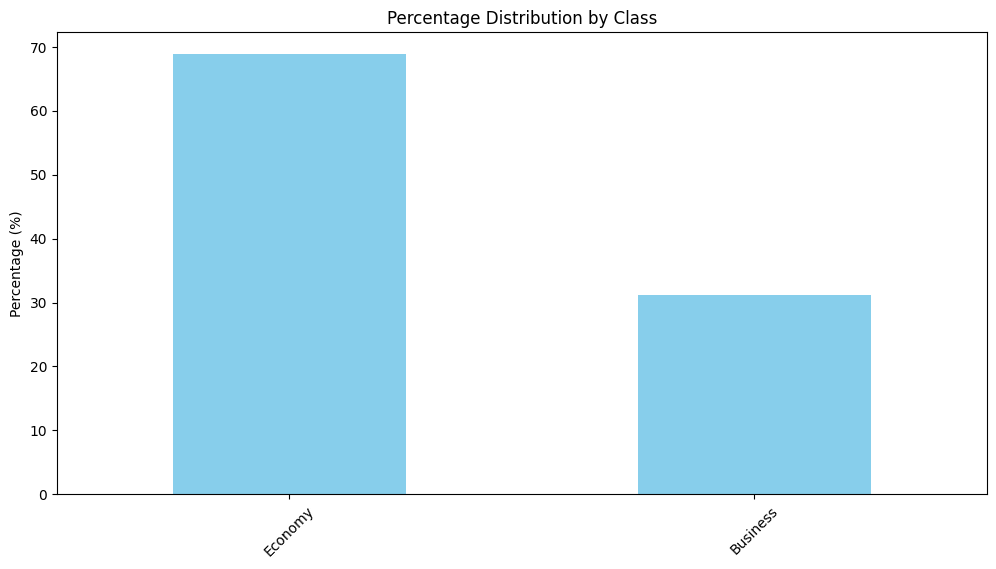

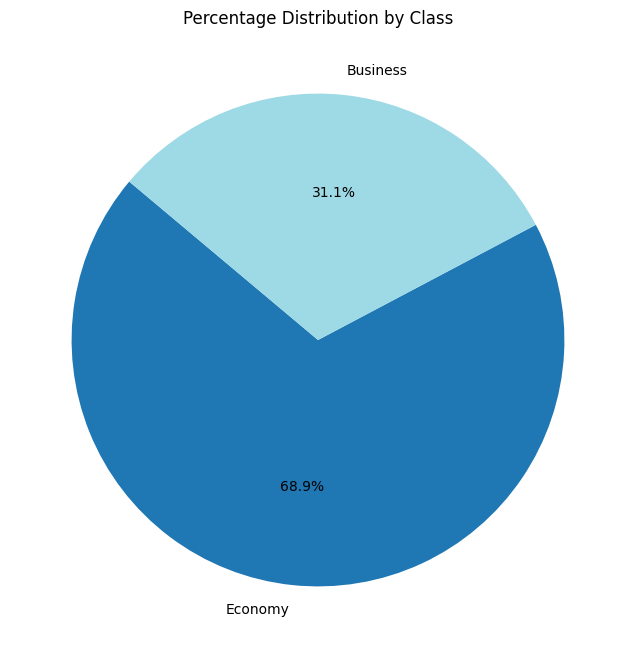

In [0]:
import matplotlib.pyplot as plt

# Convert to Pandas for plotting
class_counts = flights_df_clean.select('Class').toPandas()['Class'].value_counts()
class_percentages = class_counts / class_counts.sum() * 100

# Bar Chart
plt.figure(figsize=(12,6))
class_percentages.plot(kind='bar', color='skyblue')
plt.ylabel('Percentage (%)')
plt.title('Percentage Distribution by Class')
plt.xticks(rotation=45)
plt.show()

# Pie Chart
plt.figure(figsize=(8,8))
class_percentages.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='tab20')
plt.title('Percentage Distribution by Class')
plt.ylabel('')
plt.show()
